LifeLux Inc, a consumer goods company sells variety products through various retail channels. Over the years, they have invested a lot in television, radio, newspaper advertisement to drive sales and increase brand awareness. The company recently has become concerned about the effectiveness of its advertising spend, as it  is becoming difficult to measure the return on investment for each advertising channel. In order to better understand the relationship between advertisement and unit sales, the company has task us to build a model that will effectively predict unit sales based on the amount spent on TV, Radio and newspaper advertisement

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Newton\Downloads\Advertising.csv")


In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


<AxesSubplot:xlabel='TV', ylabel='Sales'>

<Figure size 432x288 with 0 Axes>

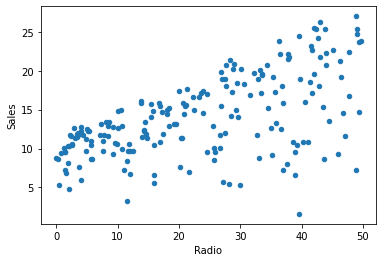

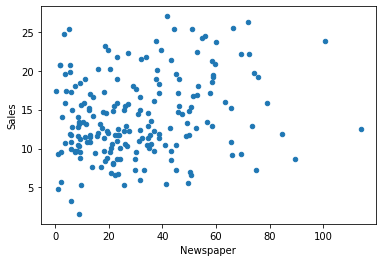

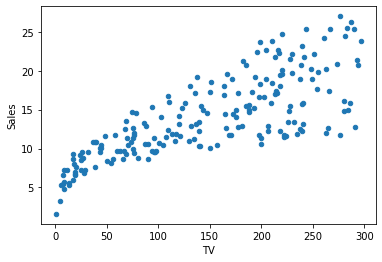

In [5]:

plt.figure()
df.plot(kind="scatter",y="Sales",x="Radio")
df.plot(kind="scatter",y="Sales",x="Newspaper")
df.plot(kind="scatter",y="Sales",x="TV")


In [6]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


### Data Preparation

In [7]:
X = df.drop("Sales",axis=1)
Y =df["Sales"]

In [8]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [9]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [10]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3,random_state=42)

In [12]:
X_train.head()

,TV,Radio,Newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5


In [13]:
X_train.shape,Y_train.shape

((140, 3), (140,))

In [14]:
from sklearn.linear_model import LinearRegression


In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train,Y_train)

LinearRegression()

In [17]:
pred=model.predict(X_test)
pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [18]:
Y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
195     7.6
29     10.5
19     14.6
143    10.4
86     12.0
114    14.6
173    11.7
5       7.2
126     6.6
117     9.4
73     11.0
140    10.9
98     25.4
172     7.6
96     11.7
Name: Sales, dtype: float64

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(Y_test,pred)

1.5116692224549086

In [20]:
mean_squared_error(Y_test,pred)

3.79679723671522

In [21]:
Y.mean()

14.022500000000003

In [22]:
(1.51167/14.022)*100

10.780701754385966

In [23]:
#Data Preparation starts with splitting the data into training and test data
X = df.drop("Sales",axis=1)
Y = df["Sales"]

In [24]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [25]:
Y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [26]:
#We split the dataset for testing and training data
from sklearn.model_selection import train_test_split


train_test_split returns (x1,x2) (y1,y2) we want to store them into X_train,X_test,Y_train,Y_test respectively

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=42)

AttributeError: 'numpy.ndarray' object has no attribute 'xaxis'

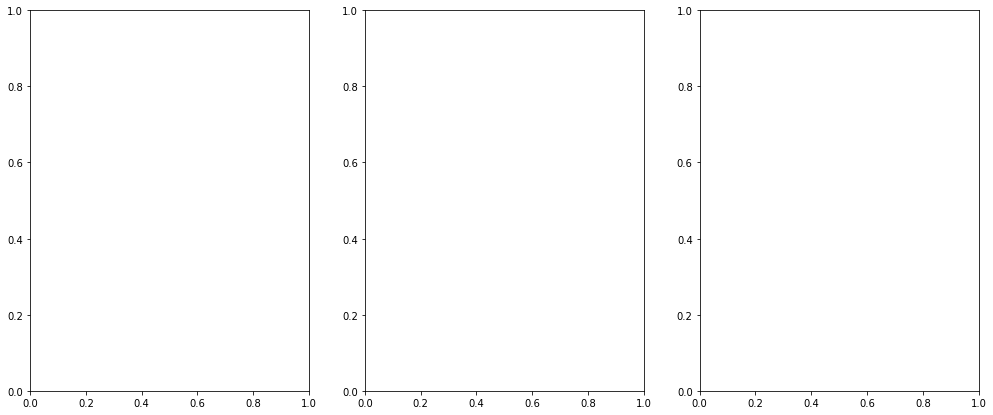

In [28]:
fig, axes = plt.subplots(nrows=1,ncols = 3, figsize=(17,7))
sns.scatterplot(data=df,x="TV",y="Sales",ax=axes)

In [ ]:
X_train

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#To clone it
#Remember to put the bracket in the cloning process
model = LinearRegression()

In [ ]:
#Training the data using linear regression


model.fit(X_train,Y_train)

In [ ]:
#Predicting the values
pred = model.predict(X_test)

In [ ]:
pred

In [ ]:
Y_test

In [ ]:
#To see how good the model is
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
residual = Y_test - pred
residual

In [ ]:
np.mean(np.abs(residual))

In [ ]:
#THe mean absolute error doesnt penalise the big mistakes
mean_absolute_error(Y_test,pred)

In [ ]:
np.mean(residual**2)

In [ ]:
mean_squared_error(Y_test,pred)

In [ ]:
#You can only compare the the absolute mean
Y.mean()
#The ave

On average the sales made are 14.022, and the error the machine is making is 1.52

In [ ]:
#Converting the error into percentage
(1.5116692224549086/14.022500000000003) * 100

In [ ]:
#The machine is making a 10% error.

In [ ]:
#Residual plot is to tell us if the model is good 
#We plot the errors against the actual values
sns.scatterplot(x=Y_test,y=residual)
plt.axhline(y=0,c="red",ls="--")
plt.ylabel("residual")
#A good fit should have the points align with the dotted line
#The points should be randomly scattered with no patterns at all

In [ ]:
#Saving  the model after you conclude that everything is good
final_model = LinearRegression()

In [ ]:
all_X = model.predic

In [ ]:
final_model.fit(X,Y)

In [ ]:
from joblib import dump, load

In [ ]:
dump(final_model, "advert_sales_predictor.joblib")

Dear Cutbert,
We appreciate the time adn effort you put into developing a unit sales prediction model for our company, howerver, after reviewing the model perfomance , we have determined that it dows not meet our expectations.
We kindly request that you continue to work on the model and explore ways to improve the perfomance.We hope you try alternative algorithm or data preprocessing techniques to better capture the non-linear relations between the input variables and the targets variables.
Building high-perfoming model cn be a herculean task, and we do appreciate your continued effort. Please keep us updated.